## Final Project Submission

Please fill out:
* Student name: Dirk Van Curan
* Student pace: Full time
* Scheduled project review date/time:  August 23, 2019 9:30 am
* Instructor name: Cristian
* Blog post URL:


In [ ]:
# Your code here - remember to use markdown cells for comments as well!

In [ ]:
"""This file contains some in progress code on our Mod 1 project.
In this project, we are given real estate sales data from King
County in Seattle, and we are asked to make a predictor for price."""

In [7]:
# import modules needed for data analysis and get them ready for use in the notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [8]:
# import the given data and store it in a pandas DataFrame
raw_data = pd.read_csv("kc_house_data.csv")

## Initial exploration of what the data looks like

In [9]:
raw_data.shape

(21597, 21)

In [10]:
raw_data.head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [11]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


## Decided to use only the zipcodes of each sale as a initial model

In [12]:
# Convert the zipcodes to an array of One Hot values instead of a column of integers
# Zipcodes are not really useful as integers since they are actually categorical 
# values and being in a zipcode or not is more helpful for the model
ohe = OneHotEncoder(drop='first', categories='auto') 

In [13]:
price_zip_trans = ohe.fit_transform(raw_data['zipcode'].values.reshape(-1,1))

In [14]:
ohe.get_feature_names()

array(['x0_98002', 'x0_98003', 'x0_98004', 'x0_98005', 'x0_98006',
       'x0_98007', 'x0_98008', 'x0_98010', 'x0_98011', 'x0_98014',
       'x0_98019', 'x0_98022', 'x0_98023', 'x0_98024', 'x0_98027',
       'x0_98028', 'x0_98029', 'x0_98030', 'x0_98031', 'x0_98032',
       'x0_98033', 'x0_98034', 'x0_98038', 'x0_98039', 'x0_98040',
       'x0_98042', 'x0_98045', 'x0_98052', 'x0_98053', 'x0_98055',
       'x0_98056', 'x0_98058', 'x0_98059', 'x0_98065', 'x0_98070',
       'x0_98072', 'x0_98074', 'x0_98075', 'x0_98077', 'x0_98092',
       'x0_98102', 'x0_98103', 'x0_98105', 'x0_98106', 'x0_98107',
       'x0_98108', 'x0_98109', 'x0_98112', 'x0_98115', 'x0_98116',
       'x0_98117', 'x0_98118', 'x0_98119', 'x0_98122', 'x0_98125',
       'x0_98126', 'x0_98133', 'x0_98136', 'x0_98144', 'x0_98146',
       'x0_98148', 'x0_98155', 'x0_98166', 'x0_98168', 'x0_98177',
       'x0_98178', 'x0_98188', 'x0_98198', 'x0_98199'], dtype=object)

In [15]:
# this takes the One Hot encoded array and makes a new sparse DataFrame
# the column names are the zipcodes and the values are Boolean 1s or 0s
# depending on if the sale happened in that zipcode
zip_sparce = pd.DataFrame(price_zip_trans.todense(), columns=ohe.get_feature_names())

In [16]:
# adding the sale prices as a new column to the sparse array so that it can be
# used in a model
zip_sparce['price'] = raw_data['price']

In [17]:
# initial examination of correlation between price and zipcode
zip_sparce.corr()['price'].sort_values(ascending=False)

price       1.000000
x0_98004    0.271184
x0_98039    0.212561
x0_98040    0.204952
x0_98112    0.169957
x0_98006    0.133677
x0_98033    0.102551
x0_98105    0.091003
x0_98075    0.088634
x0_98199    0.083688
x0_98119    0.078077
x0_98102    0.068037
x0_98109    0.065875
x0_98005    0.065075
x0_98074    0.057136
x0_98053    0.051394
x0_98052    0.047205
x0_98177    0.040503
x0_98077    0.037336
x0_98115    0.036113
x0_98008    0.033039
x0_98122    0.029935
x0_98027    0.029138
x0_98116    0.026584
x0_98029    0.024190
x0_98103    0.020628
x0_98144    0.018815
x0_98007    0.016982
x0_98117    0.016123
x0_98107    0.011798
              ...   
x0_98166   -0.022561
x0_98028   -0.024406
x0_98125   -0.026613
x0_98045   -0.027633
x0_98019   -0.029616
x0_98148   -0.035762
x0_98126   -0.040609
x0_98056   -0.044989
x0_98155   -0.046074
x0_98108   -0.046840
x0_98118   -0.051608
x0_98188   -0.054438
x0_98146   -0.057217
x0_98032   -0.060024
x0_98022   -0.063552
x0_98133   -0.063775
x0_98178   -0

In [18]:
price_array = np.asarray(zip_sparce['price'])

price_array

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

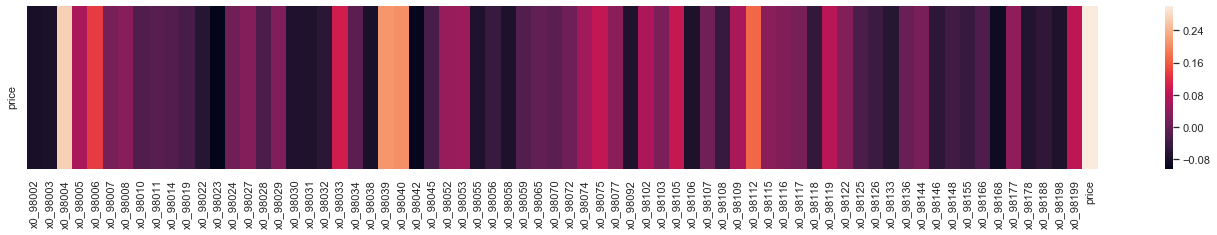

In [19]:
import seaborn as sns
sns.set(rc={'figure.figsize':(24,3)})
sns.heatmap(zip_sparce.corr().loc[['price']],vmax=0.3);

## Begin doing linear regression

In [21]:
# Choose our predictors for the model
X = zip_sparce.drop('price', axis=1)
y = zip_sparce['price']
X.shape

(21597, 69)

In [ ]:
# Initial rough model for exploration
predictors = sm.add_constant(X)
model = sm.OLS(y, predictors).fit()
model.summary()

## Try with improved modeling (not StatsModels)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(zip_sparce.drop('price', axis=1), 
                                                    zip_sparce['price'],
                                                   random_state=42)

In [ ]:
# Let's create a StandardScaler object to scale our data for us.
ss = StandardScaler()

# Now we'll apply it to our data by using the .fit() and transform() methods.
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)


In [ ]:
# Now we can fit a LinearRegression object to our training data!

lr = LinearRegression()
lr.fit(X_train_sc, y_train)

In [ ]:
lr.score(X_test_sc, y_test)


In [ ]:
# We can use the .coef_ attribute to recover the results
# of the regression.

lr.coef_

In [ ]:
# And .intercept_

lr.intercept_

In [ ]:
X_train.columns

Erin suggested avoiding groupby to make a bunch of different dataframes. Instead, consider making "hybrid" columns that play with the data you are given to give another metric for the model to use.

Remember to clean the data as you go!

Think about the assumptions of the model you're using and if you need to transform your data

In [ ]:
test = raw_data.groupby('zipcode')

In [ ]:
test.reset_index()

In [ ]:
for name, group in test:
    print(name)
    print(group)

In [ ]:
test.get_group(98178)

In [ ]:
raw_data.columns

In [ ]:
test.info

In [ ]:
raw_data['view'].sum()

In [ ]:
raw_data['waterfront'].sum()

In [ ]:
test2 = raw_data.drop()

In [ ]:
raw_data.describe()

In [ ]:
plt.hist(raw_data['bedrooms'],range=(1,6));

# What to do with the columns that have null values?
waterfront: A: there are only 146 records on the waterfront. I think we can drop this column
view: A: drop this as I don't think this helps. If we convert the nulls to zero, it doesn't seem to affect the value of the column much. Before cleaning, there are only 5,036 records that have view out of ~21,600
yr_renovated: A: I think we can convert year renovated to the yr_built value if it is null and then make a new column called age_since_upgrade

Erin: What if you looked at sqftliving/ rooms?

In [ ]:
view_nan_dropped = raw_data.dropna(axis='rows', subset=['view', 'price'])
view_nan_dropped

In [ ]:
only_view_and_price = view_nan_dropped.filter(['view', 'price'], axis=1)
only_view_and_price

In [ ]:
only_view_and_price.corr()['price'].sort_values(ascending=False)

This is a surprisingly high correlation. We were expecting no correlation

In [ ]:
plt.hist(only_view_and_price['view']);

In [ ]:
only_4_views = raw_data.loc[raw_data['view'] == 4]

In [ ]:
plt.hist(only_4_views['price']);

In [ ]:
only_4_views['price'].describe()

I think the view data should be dropped as using it would break one of the assumptions of linear regression. Linear regression assumes that all the independent variables follow a normal distribution, but View is so heavily skewed right(?) that it should not be considered a normal distribution. Almost 20k of the 21k records have 0 views.


Dirk: These are actually categorical 

In [ ]:
raw_data['waterfront'].describe()

In [ ]:
plt.hist(raw_data['waterfront']);

A similar logic should be followed for Waterfront. There are only 146 records with a waterfront with ~3000 nan values. Even if the NaN values were replaced with 1, this would result in a bimodel distribution, not a normal one.

Not enough values with a weak correlation

Since we are looking at prices, the unique IDs should not be relevant for our model. That colummn should also be dropped.

In [ ]:
wf_nan_dropped = raw_data.dropna(axis='rows', subset=['waterfront', 'price'])
only_wf_and_price = wf_nan_dropped.filter(['waterfront', 'price'], axis=1)
only_wf_and_price.corr()['price'].sort_values(ascending=False)

In [ ]:
wf_replace_na_with_0 = raw_data.fillna(0)
only_wf_no_nan_and_price = wf_replace_na_with_0.filter(['waterfront', 'price'], axis=1)
only_wf_no_nan_and_price.corr()['price'].sort_values(ascending=False)

In [ ]:
wf_replace_na_with_0['waterfront'].sum()

In [ ]:
yr_built_price = raw_data.filter(['yr_built', 'price'])
yr_built_price.corr()['price'].sort_values(ascending=False)

In [ ]:
import datetime

In [ ]:
current_time = datetime.datetime.now()
type(current_time.year)

In [ ]:
yr_built_price['age_int'] =  current_time.year - raw_data['yr_built']

In [ ]:
yr_built_price = yr_built_price.drop('age_datetime',axis=1)

In [ ]:
yr_built_price.info()

In [ ]:
yr_built_price.corr()['price'].sort_values(ascending=False)

The correlation between price and age is weak and thus we should drop age from the model

In [ ]:
yrreno_replace_na_with_0 = raw_data.dropna(0)
only_reno_no_nan_and_price = yrreno_replace_na_with_0.filter(['yr_renovated', 'price'], axis=1)
only_reno_no_nan_and_price.corr()['price'].sort_values(ascending=False)

This is also a weak correlation, so we should drop this

In [ ]:
raw_data.columns

In [ ]:
working_data = raw_data.drop(['id', 'waterfront', 'date', 'yr_built', 
                              'yr_renovated', 'sqft_living15', 'sqft_lot15'], axis=1)

In [ ]:
working_data.head()

In [ ]:
working_data.corr()['price'].sort_values(ascending=False)

In [ ]:
working_data = working_data.drop('sqft per room', axis=1)

In [ ]:
working_data['lat_by_long'] = working_data['lat'] / working_data['long']

What if we did a one hot encode on view? It would hopefully reduce the importance of view rated 0 but significantly improve the impact of a view rated as 4
    The one hot encode on view reduced the correlation between a 4 view and price. If we keep view, we should not do a OHE

Should we one hot encode condition?
    Condition's correlation is very weak and did not improve by doing a one hot encode. We think we should drop condition as a parameter for the model

Can we hybridize view and grade? Or view and condition?

Figure out normalize for categories
    could do sqft_living, sqft_lot, bedrooms, bathrooms, floors 
    
Is there a way to hybridize sqft_living and sqft_lot?
    Add the values?
    Division? (living/floors)/lot or lot/living?
    Could also do lot - living/floor?
    
Can we use latitude and longitude? Would we scale to the most expensive lat/long location?

Whenever we do more basic correlation exploration, we should say why we're not doing a more detailed analysis
    Simple correlation to determine whether or not we should do a more in depth analysis.
        
    If the correlation is already weak, it isn't likely to help us later
        


In [ ]:
view_price_data = working_data['view'].fillna(0)
view_price_data

In [ ]:
price_view_trans = ohe.fit_transform(view_price_data.values.reshape(-1,1))
view_sparce = pd.DataFrame(price_view_trans.todense(), columns=ohe.get_feature_names())
view_sparce['price'] = working_data['price']
view_sparce.corr()['price'].sort_values(ascending=False)

In [ ]:
cond_price_data = working_data['condition']
price_cond_trans = ohe.fit_transform(cond_price_data.values.reshape(-1,1))
cond_sparce = pd.DataFrame(price_cond_trans.todense(), columns=ohe.get_feature_names())
cond_sparce['price'] = working_data['price']
cond_sparce.corr()['price'].sort_values(ascending=False)

In [ ]:
plt.hist(working_data['grade'], range=(0,4));

In [ ]:
grade_price_data = working_data['grade']
price_grade_trans = ohe.fit_transform(grade_price_data.values.reshape(-1,1))
grade_sparce = pd.DataFrame(price_grade_trans.todense(), columns=ohe.get_feature_names())
grade_sparce['price'] = working_data['price']
grade_sparce.corr()['price'].sort_values(ascending=False)

In [ ]:
mean_grade = working_data['grade'].mean()
working_data['grade'] - mean_grade
median_grade = working_data['grade'].median()
median_grade
(working_data['grade'] - median_grade)/median_grade
std_grade = working_data['grade'].std()

In [ ]:
view_grade_hybridize = working_data['view'].fillna(0) * (working_data['grade'] - median_grade)/std_grade
#view_grade_hybridize['price'] = working_data['price']

In [ ]:
type(working_data['price'])

In [ ]:
view_grade_dict = {'view_grade_hybrid': view_grade_hybridize, 'price': working_data['price']}
view_grade_df = pd.DataFrame(view_grade_dict)
view_grade_df.corr()['price'].sort_values(ascending=False)

Drop 33 bedroom houses


In [ ]:
plt.hist(np.log(working_data['price']));

In [ ]:
lat_long = working_data.filter(['lat', 'long'])
lat_long.head()

In [ ]:
working_data = working_data.drop(['view', 'lat', 'long', 'condition'], axis=1)

In [ ]:
minus_33_rooms = working_data[working_data['bedrooms'] != 33] 

In [ ]:
minus_33_rooms.describe()

In [ ]:
finder = minus_33_rooms[(working_data['bedrooms'] >= 8)]
finder

In [ ]:
raw_data['floors'].describe()

In [ ]:
plt.hist(raw_data['floors']);

In [ ]:
working_data = working_data.drop(['sqft_above'], axis=1)

In [ ]:
working_data.columns

In [ ]:
working_data = working_data.drop('lat_by_long', axis=1)

In [ ]:
working_data.columns

In [ ]:
minus_33_rooms = working_data[working_data['bedrooms'] != 33] 

In [ ]:
minus_33_rooms.describe()

# Have cleaned data, switching drivers

In [5]:
minus_33_rooms = minus_33_rooms.drop(['id', 'date', 'waterfront', 'view', 'condition', 
                                      'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
                                     'lat', 'long', 'sqft_living15', 'sqft_lot15'], axis=1)



NameError: name 'minus_33_rooms' is not defined